## Leslie English

## Capstone Project - October 2024

### UC Berkeley Professional Certificate in Machine Learning and Artificial Intelligence

# BUSINESS UNDERSTANDING

## Project Overview

GitHub.com Repository: https://github.com/LeslieSeattle/UCB-ML-AI-Capstone-Preliminary

#### UW Project: 
In 2023, a team of University of Washington, Seattle (UW) researchers and Seattle-area scientists published a paper titled “ExplaiNAble BioLogical Age (ENABL Age): an artificial intelligence framework for interpretable biological age” (The Lancet Healthy Longevity, Volume 4, Issue 12, E711-E723, December 2023, Open Access. Wei Qiu, MSc ∙ Hugh Chen, PhD ∙ Prof Matt Kaeberlein, PhD ∙ Prof Su-In Lee, PhD  ∙ https://www.thelancet.com/journals/lanhl/article/PIIS2666-7568(23)00189-7/fulltext). The paper explained the artificial intelligence model they built to create an age clock that estimates a person’s biological age based upon medical, health, and lifestyle data provided by the person. 

#### UW Data: 
The UW model used twenty features selected from approximately a thousand available features drawn from two dataset sources: (1) the UK Biobank, and (2) National Health and Nutrition Examination Survey (NHANES) program of the National Center for Health Statistics (NCHS) within the Centers for Disease Control and Prevention (CDC). https://www.cdc.gov/nchs/nhanes/about_nhanes.htm

#### Capstone Research Question: 
The purpose of this UCB capstone project is to return to the original NHANES database from which the UW model selected its twenty features, and build a new ML/AI model with a different combination of twenty features, to determine if a more accurate age clock can be created through a different feature selection strategy. Additionally, multiple regression models will be evaluated.

#### Capstone Rationale: 
If people can obtain information detailed information about the specific aspects of their physical health that are having the most detrimental effect upon their longevity, then they are empowered to make the lifestyle choices necessary to bring their biological age in closer alignment with their chronological age, to live a longer and healthier life.

#### Capstone Data: 
This project will only select features from the NHANES program dataset, and will not draw from data in the UK Biobank. Among the NHANES features, this project will only use laboratory bloodwork data, and will exclude the use of data collected from (1) Physical Examinations, (2) Lifestyle Questionnaires, and (3) Demographic Questionnaires.

## Project Methodology 

   ##### 1. Clean Data:     
   
    Remove from the NHANES dataset all features that contain physical examination data, lifestyle data, and demographic data (except age, which is the target).
    
   ##### 2. Select Features: 
   
    Perform feature selection to narrow the HNANES dataset down to nineteen features, to match the size of the UW datset. 
    
   ##### 3. Build Models: 
    Build regression models, optimized using GridSearchCV for hyperparameter tuning, where relevant:

   ##### 4. Evaluate Model Performance: 
    Train and test each model separately on both the UW data and the Capstone data, to see which dataset results in better model performance based upon: mean squared error (MSE), and adjusted R2.


In [131]:
## Import Python libraries and functions

import pandas as pd
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# DATA UNDERSTANDING

Both the UW dataset and the full NHANES dataset are free of obvious data quality problems:
    
    All data are either float or integer values. No column transformations are required.
    All observations have values, no blanks. No imputations are required.
    There are some unnecessary columns that represent outcomes, not features or targets, and these will be removed.


In [2]:
# Enable multiple print statements 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import UW Project Dataset: 27 columns total

Data_UW_20 = pd.read_csv('Data_UW_20.csv')

# Import NHANES dataset = 223 columns total

Data_NH_200 = pd.read_csv('Data_NHANES_200.csv')

#### ORIGINAL DATA SETS

#### UW data set features include data categories of: demographics, patient self-reporting questionnaire, physical examination by a medical professional, and laboratory results (bloodwork and urine). 

#### NHANES full data set features span the same feature categories (demographics, questionnaire, examination, laboratory) as the UW data set, but there are 223 columns, which is too large to display.

In [4]:
### ORIGINAL UW DATASET ###

Data_UW_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47279 entries, 0 to 47278
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Demographics_Age                              47279 non-null  float64
 1   Laboratory_BloodLeadSI                        47279 non-null  float64
 2   Laboratory_RedCellDistributionWidth           47279 non-null  float64
 3   Questionnaire_GeneralHealth                   47279 non-null  int64  
 4   Laboratory_UrineAlbumin                       47279 non-null  float64
 5   Demographics_IncomeRatio                      47279 non-null  float64
 6   Examination_ArmCircum                         47279 non-null  float64
 7   Laboratory_BloodCadmium                       47279 non-null  float64
 8   Laboratory_AlbuminSI                          47279 non-null  float64
 9   Questionnaire_SpecialHealthCareEquipment_2.0  47279 non-null 

# DATA PREPARATION

### UW Dataset Features

In [5]:
# Change name of target column from "Demographics_Age" to "Age", because age is the target,
# and it needs to be separated from the "Demographics" columns that are features.

UWdf = Data_UW_20.copy()
UWdf.rename(columns={"Demographics_Age": "Age"}, inplace=True)

In [6]:
# Sort columns in alphabetic order

UWdf = UWdf.sort_index(axis=1)

In [7]:
# Drop all columns for year_label, mortstat, permth, and year_label, 
# because they are all outcomes, not input features. 
# This leaves 19 feature columns and 1 target column in the UW dataset.

UWdf.drop(list(UWdf.filter(regex='mortstat|permth|year_label')), axis=1, inplace=True)
UWdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47279 entries, 0 to 47278
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           47279 non-null  float64
 1   Demographics_Education                        47279 non-null  int64  
 2   Demographics_Gender_2.0                       47279 non-null  int64  
 3   Demographics_IncomeRatio                      47279 non-null  float64
 4   Demographics_RaceEthnicity_3.0                47279 non-null  int64  
 5   Examination_ArmCircum                         47279 non-null  float64
 6   Examination_ExBPMaxInflationLevel             47279 non-null  float64
 7   Laboratory_AlbuminSI                          47279 non-null  float64
 8   Laboratory_BloodCadmium                       47279 non-null  float64
 9   Laboratory_BloodLeadSI                        47279 non-null 

In [139]:
# SPLIT X, y

UWX = UWdf.drop('Age', axis=1)
print('\n')
# print('**********') 
print('************************ NOTE ************************ ')
print('Dataframe UWX column numbers listed below are the') 
print('same as the column identification numbers that')
print('LASSO Regulation feature coefficients will reference.')
print('******************************************************', '\n')
UWX.info()

UWy = UWdf['Age']

# CROSS-VALIDATION: Split into random train (80%) and test (20%) subsets.
# Use random_state so that results are consistent during model development,
# and alternative approaches can be accurately compared to each other.

UWX_train, UWX_test, UWy_train, UWy_test = train_test_split(UWX, UWy, test_size=0.2, random_state=42)

# NORMALIZE: Feature (X) data

scaler = StandardScaler()
UWX_train_scaled = scaler.fit_transform(UWX_train)
UWX_test_scaled = scaler.transform(UWX_test)



************************ NOTE ************************ 
Dataframe UWX column numbers listed below are the
same as the column identification numbers that
LASSO Regulation feature coefficients will reference.
****************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47279 entries, 0 to 47278
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Demographics_Education                        47279 non-null  int64  
 1   Demographics_Gender_2.0                       47279 non-null  int64  
 2   Demographics_IncomeRatio                      47279 non-null  float64
 3   Demographics_RaceEthnicity_3.0                47279 non-null  int64  
 4   Examination_ArmCircum                         47279 non-null  float64
 5   Examination_ExBPMaxInflationLevel             47279 non-null  float64
 6   Laboratory_AlbuminSI

#### UW dataset is now defined by: UWX_train_scaled, UWX_test_scaled, UWy_train, UWy_test

### NHANES Dataset

#### This Capstone project selects a set of features from the NHANES dataset. Only laboratory data will be included in feature selection, because laboratory data has the highest level of reliability among all of the NHANES features categories. Several categories of less reliable data (patient self reporting questionnaire, physical examination, dietary habits, etc.) will be deleted from the dataset.

In [9]:
### ORIGINAL NHANES DATASET ###

# Change name of target column from "Demographics_Age" to "Age", 
# so it is retained when demographic data is removed from the dataset.

NHdf = Data_NH_200.copy()
NHdf.rename(columns={"Demographics_Age": "Age"}, inplace=True)

In [10]:
# Sort columns in alphabetic order

NHdf = NHdf.sort_index(axis=1)

In [11]:
# Drop all columns for Dietary, Questionnaire, Examination, Demographics, year_label (not a feature), 
# mortstat (an outcome, not a feature), permth (an outcome, not a feature).
# This leaves 57 laboratory features, and 1 age target column.

NHdf.drop(list(NHdf.filter(regex='Dietary|Questionnaire|Examination|Demographics|year_label|mortstat|permth')), 
          axis=1, inplace=True)
NHdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47279 entries, 0 to 47278
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         47279 non-null  float64
 1   Laboratory_AlanineAminotransferaseALT       47279 non-null  float64
 2   Laboratory_AlbuminSI                        47279 non-null  float64
 3   Laboratory_AlkalinePhosphatase              47279 non-null  float64
 4   Laboratory_AspartateAminotransferaseAST     47279 non-null  float64
 5   Laboratory_Basophils                        47279 non-null  float64
 6   Laboratory_BasophilsPercent                 47279 non-null  float64
 7   Laboratory_Bicarbonate                      47279 non-null  float64
 8   Laboratory_BloodCadmium                     47279 non-null  float64
 9   Laboratory_BloodLeadSI                      47279 non-null  float64
 10  Laboratory

In [18]:
# SPLIT X, y

NHX = NHdf.drop('Age', axis=1)      # <class 'pandas.core.frame.DataFrame'>
print('\n')
# print('**********') 
print('************************ NOTE ************************ ')
print('Dataframe NHX column numbers listed below are the') 
print('same as the column identification numbers that')
print('Sequential Feature Selection will reference.')
print('******************************************************', '\n')
NHX.info()

NHy = NHdf['Age']
#print('Dataframe NHY', '\n')
#print('\n', '\n')
#NHy.info()

# CROSS-VALIDATION: Split into random train (80%) and test (20%) subsets.

NHX_train, NHX_test, NHy_train, NHy_test = train_test_split(NHX, NHy, test_size=0.2, random_state=42)

# NORMALIZE: Feature (X) data

scaler = StandardScaler()
NHX_train_scaled = scaler.fit_transform(NHX_train)        # <class 'numpy.ndarray'>
NHX_test_scaled = scaler.transform(NHX_test)



************************ NOTE ************************ 
Dataframe NHX column numbers listed below are the
same as the column identification numbers that
Sequential Feature Selection will reference.
****************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47279 entries, 0 to 47278
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Laboratory_AlanineAminotransferaseALT       47279 non-null  float64
 1   Laboratory_AlbuminSI                        47279 non-null  float64
 2   Laboratory_AlkalinePhosphatase              47279 non-null  float64
 3   Laboratory_AspartateAminotransferaseAST     47279 non-null  float64
 4   Laboratory_Basophils                        47279 non-null  float64
 5   Laboratory_BasophilsPercent                 47279 non-null  float64
 6   Laboratory_Bicarbonate                      4

#### Capstone data set is now defined by:  NHX_train_scaled, NHX_test_scaled, NHy_train, NHy_test

### UW DATA & NHANES DATA - Calculate Correlation of Features to Target and Other Features

In [161]:
### CORRELATIONS BETWEEEN UW DATASET FEATURES ###

print("UW PROJECT: Correlation of features to Target 'Age':")
print('\n')
UW_highest_corr = UWdf.corr()[['Age']].nlargest(columns = 'Age', n = 20).index[1:20] # Order of strongest correlation.

#print('\n')
print(type(UWdf.corr()["Age"]))
print(UWdf.corr()["Age"].sort_values(ascending=False)) # View correlations of all features to "Age" target.
# print(UWdf.corr())      # View correlations of all features to "Age" target and to all other features.

UW PROJECT: Correlation of features to Target 'Age':


<class 'pandas.core.series.Series'>
Age                                             1.000000
Examination_ExBPMaxInflationLevel               0.531845
Questionnaire_JobMonths                         0.505640
Laboratory_BloodLeadSI                          0.265076
Questionnaire_GeneralHealth                     0.217149
Laboratory_MeanCellVolume                       0.196005
Laboratory_Creatinine                           0.189741
Laboratory_RedCellDistributionWidth             0.181469
Demographics_RaceEthnicity_3.0                  0.167696
Demographics_IncomeRatio                        0.088730
Laboratory_BloodCadmium                         0.088096
Laboratory_UrineAlbumin                         0.065066
Examination_ArmCircum                          -0.007367
Demographics_Gender_2.0                        -0.012087
Laboratory_Cotinine                            -0.048063
Laboratory_LymphocytePercent                   -0.0990

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'UW Data Correlation Matrix: Positive & Negative Correlation')

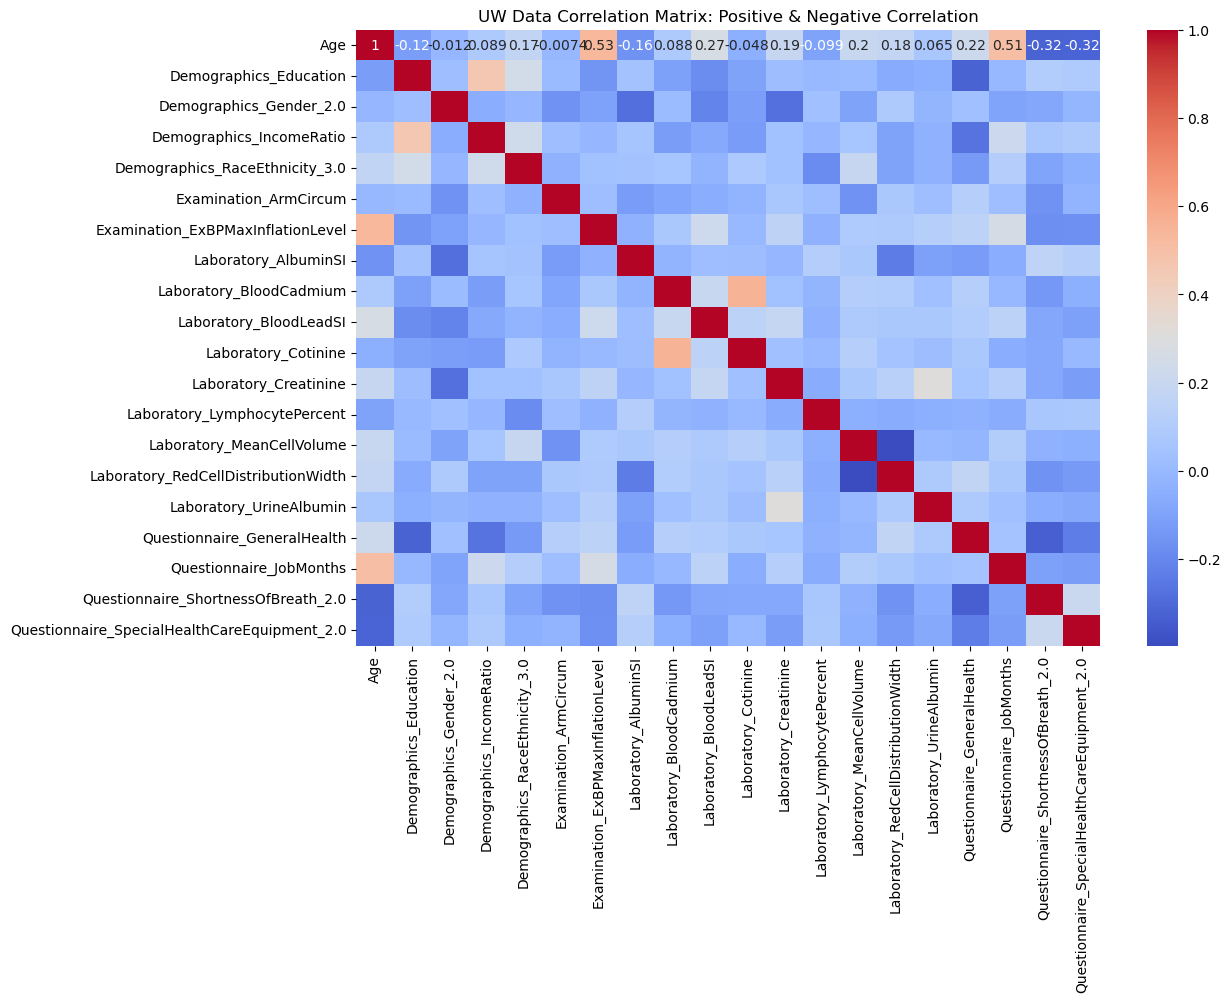

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'UW Data Correlation Matrix: Absolute Value of Correlation')

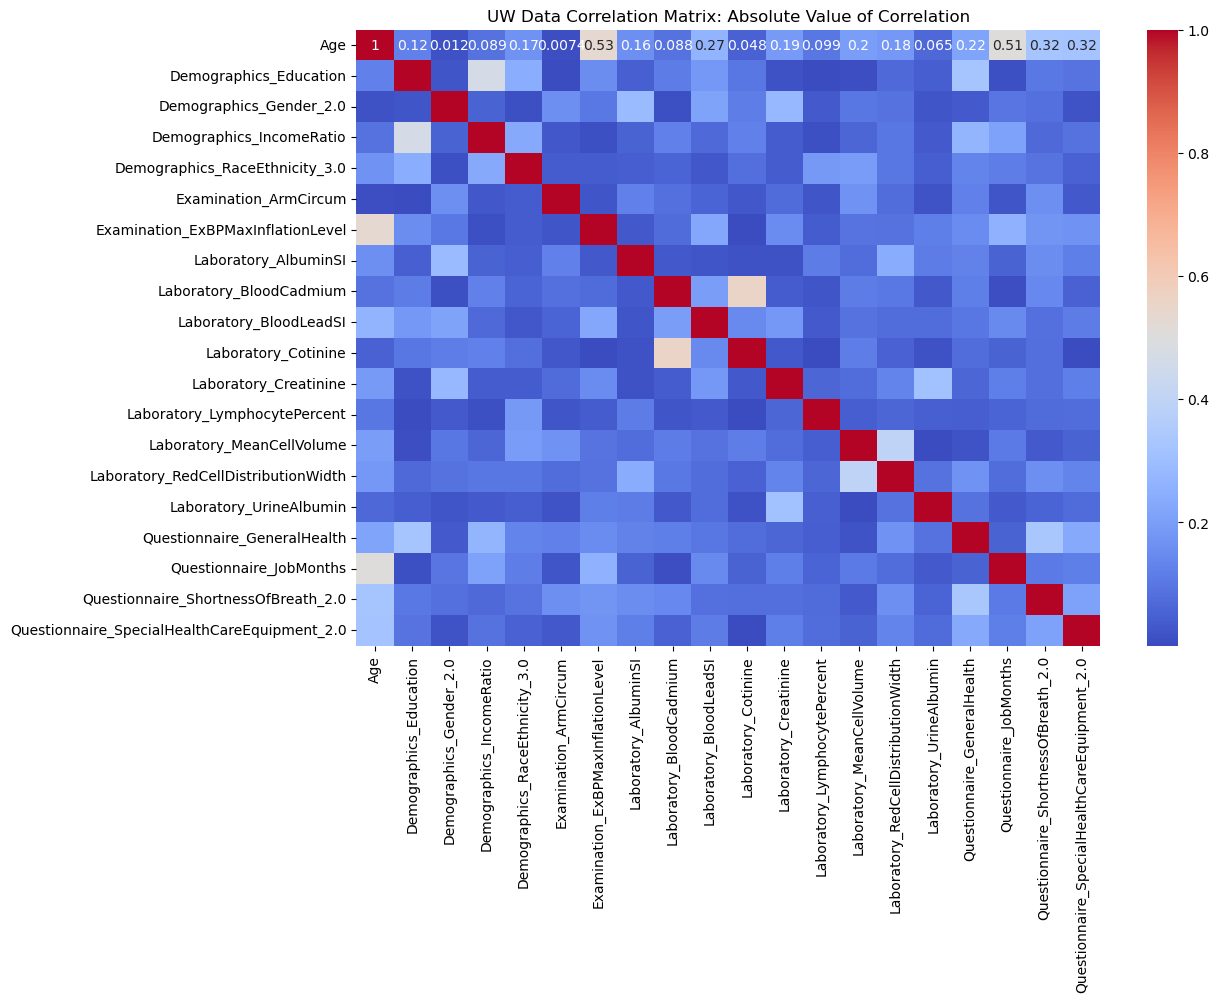

In [21]:
# HEATMAPS: Visualize correlations for UW Dataset

# Positive & Negative Correlation

plt.figure(figsize=(12, 8))
sns.heatmap(UWdf.corr(), annot=True, cmap='coolwarm')
plt.title('UW Data Correlation Matrix: Positive & Negative Correlation')
plt.show()

# Absolute Value Correlation

plt.figure(figsize=(12, 8))
sns.heatmap(UWdf.corr().abs(), annot=True, cmap='coolwarm')
plt.title('UW Data Correlation Matrix: Absolute Value of Correlation')
plt.show()

In [169]:
### CORRELATIONS BETWEEEN NHANES DATASET FEATURES ###

print("NHANES LABORATORY DATA: Correlation of features to Target 'Age':", '\n')
NH_highest_corr = NHdf.corr()[['Age']].nlargest(columns = 'Age', n = 20).index[1:20] # Order of strongest correlation.
#print(NH_highest_corr)
#print('\n')

print(NHdf.corr()["Age"].sort_values(ascending=False))
## print(NHdf.corr()["Age"]) # View correlations of all features to "Age" target.
# print(UWdf.corr())      # View correlations of all features to "Age" target and to all other features.

NHANES LABORATORY DATA: Correlation of features to Target 'Age': 

Age                                           1.000000
Laboratory_BloodUreaNitrogenSI                0.387544
Laboratory_GlycohemoglobinPercent             0.315825
Laboratory_Osmolality                         0.312639
Laboratory_BloodLeadSI                        0.265076
Laboratory_HepBSurfaceAntibody                0.255281
Laboratory_GlucoseSI                          0.238279
Laboratory_Bicarbonate                        0.208439
Laboratory_MeanCellVolume                     0.196005
Laboratory_Creatinine                         0.189741
Laboratory_Potassium                          0.187816
Laboratory_RedCellDistributionWidth           0.181469
Laboratory_CholesterolSI                      0.177655
Laboratory_UricAcid                           0.167147
Laboratory_MeanCellHemoglobin                 0.143726
Laboratory_LDLCholesterol                     0.124964
Laboratory_MonocytePercent                    0.11581

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'NHANES Data Correlation Matrix: Positive & Negative Correlation')

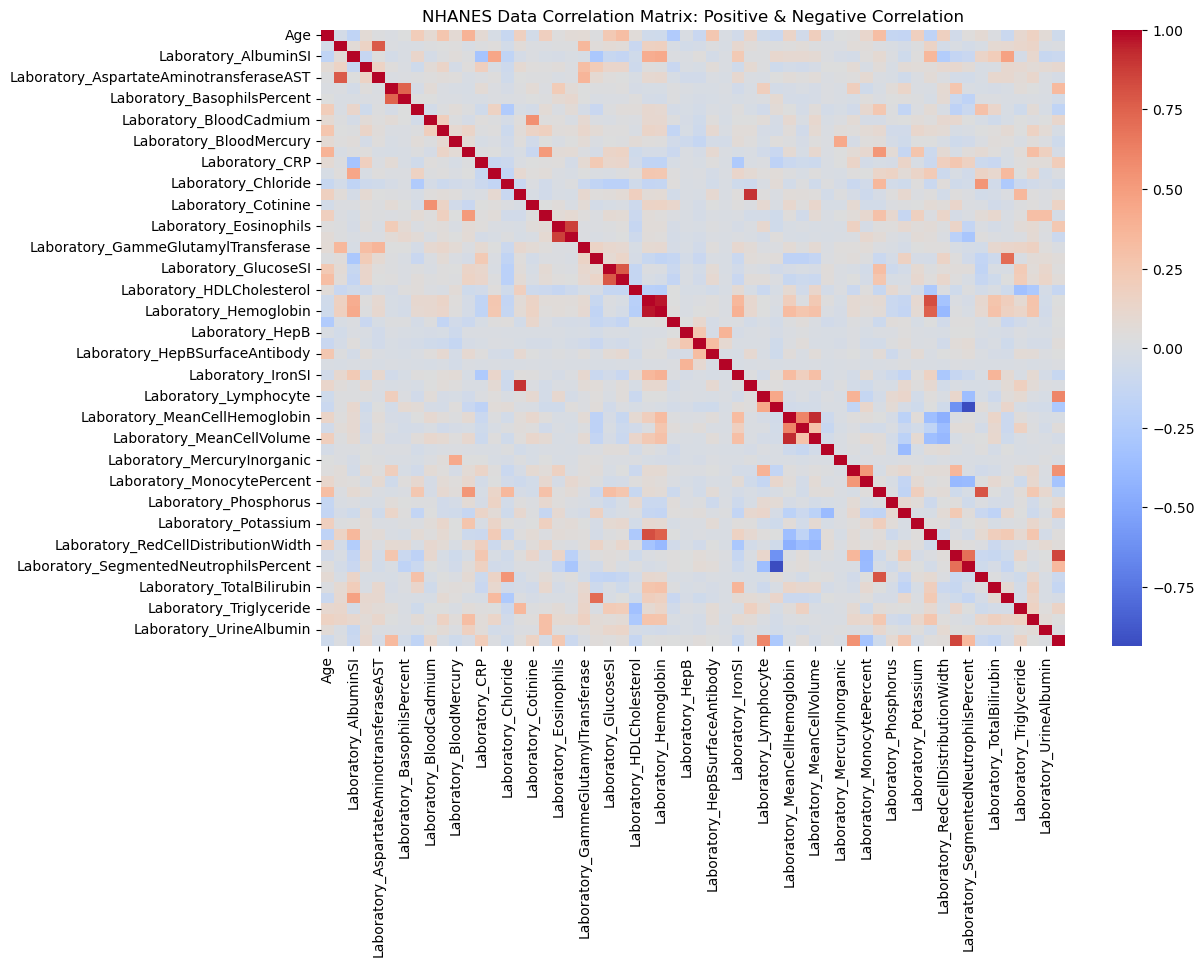

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'NHANES Data Correlation Matrix: Absolute Value of Correlation')

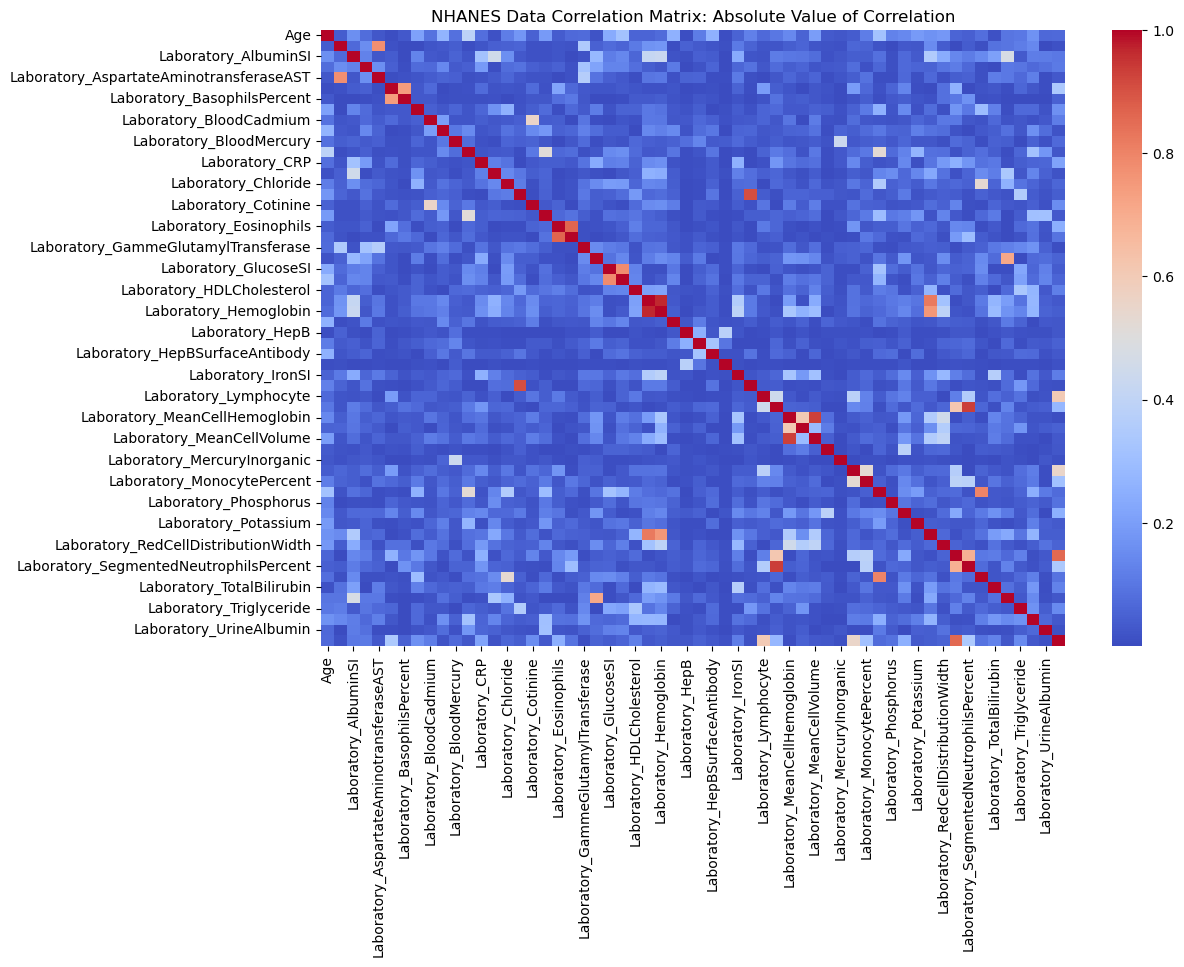

In [143]:
# HEATMAPS: Visualize correlations for NHANES Dataset

# Positive & Negative Correlation

plt.figure(figsize=(12, 8))
sns.heatmap(NHdf.corr(), annot=False, cmap='coolwarm')
plt.title('NHANES Data Correlation Matrix: Positive & Negative Correlation')
plt.show()

# Absolute Value Correlation

plt.figure(figsize=(12, 8))
sns.heatmap(NHdf.corr().abs(), annot=False, cmap='coolwarm')
plt.title('NHANES Data Correlation Matrix: Absolute Value of Correlation')
plt.show()

####  DISCUSSION & ANALYSIS of Correlation Plots:

NOTE: The NHANES heatmaps are displaying a square (row, column) for every feature in the database, but the heatmap is displaying only every other feature name (due to space constraints). 

NOTE: The UW and NHANES heatmaps are created once with positive and negative correlations, and once with only absolute value correlations. The absolute value correlations provide information about magnitude of correlation strength, which provides much more insight about which features should remain in the dataset. Features of higher correlation magnitude, regardless of whether it is a positive or negative correlation would be more valuable to keep in a reduced size model.

On the Absolute Value Correlation plots, for both the UW and NHANES datasets, the corelation squares are 
mostly blue, with very little beige, orange or red. This means that most correlation magnitudes are below 0.5.
In each absolute value plot, only a couple of squares are beige or orange, indicating low correlations between features. This will make the regression modeling theoretically more successful, since regression models do not work
with correlations. 


## NHANES DATA - Sequential Feature Selection

#### Use SequentialFeatureSelector transformer, first in forward direction, then in backward direction, with a LinearRegression estimator to: 
    select 20 features (actually 19 features and 1 target, like UW did) 
    from the NHdf dataset of 58 features (actually 57 features and 1 target).

In [27]:
# Sequential Feature Selection -- FORWARD

selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=19)

# Train the model. Creates numpy.ndarray.

best_features = selector.fit_transform(NHX_train_scaled, NHy_train)

# Assign transformed features best_features to a DataFrame.

NH20df = pd.DataFrame(best_features, columns=selector.get_feature_names_out())
NH20df.info()
#list(NH20df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37823 entries, 0 to 37822
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x6      37823 non-null  float64
 1   x8      37823 non-null  float64
 2   x10     37823 non-null  float64
 3   x14     37823 non-null  float64
 4   x21     37823 non-null  float64
 5   x22     37823 non-null  float64
 6   x26     37823 non-null  float64
 7   x28     37823 non-null  float64
 8   x29     37823 non-null  float64
 9   x31     37823 non-null  float64
 10  x32     37823 non-null  float64
 11  x34     37823 non-null  float64
 12  x37     37823 non-null  float64
 13  x41     37823 non-null  float64
 14  x43     37823 non-null  float64
 15  x46     37823 non-null  float64
 16  x47     37823 non-null  float64
 17  x48     37823 non-null  float64
 18  x52     37823 non-null  float64
dtypes: float64(19)
memory usage: 5.5 MB


In [28]:
# Sequential Feature Selection -- BACKWARD

selector_back = SequentialFeatureSelector(estimator=LinearRegression(),direction="backward",n_features_to_select=19)

# Train the model. Creates numpy.ndarray.

best_features_back = selector_back.fit_transform(NHX_train_scaled, NHy_train)

# Assign transformed features best_features to a DataFrame.

NH20df_back = pd.DataFrame(best_features_back, columns=selector.get_feature_names_out())
NH20df_back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37823 entries, 0 to 37822
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x6      37823 non-null  float64
 1   x8      37823 non-null  float64
 2   x10     37823 non-null  float64
 3   x14     37823 non-null  float64
 4   x21     37823 non-null  float64
 5   x22     37823 non-null  float64
 6   x26     37823 non-null  float64
 7   x28     37823 non-null  float64
 8   x29     37823 non-null  float64
 9   x31     37823 non-null  float64
 10  x32     37823 non-null  float64
 11  x34     37823 non-null  float64
 12  x37     37823 non-null  float64
 13  x41     37823 non-null  float64
 14  x43     37823 non-null  float64
 15  x46     37823 non-null  float64
 16  x47     37823 non-null  float64
 17  x48     37823 non-null  float64
 18  x52     37823 non-null  float64
dtypes: float64(19)
memory usage: 5.5 MB


### RESULTS & DISCUSSION: 

#### Sequential Feature Selection on the NHANES dataset generates the same results (the same list of selected features) going forward and backward:

    Data	columns	
    #	Column	
    ---	------	
    0	x6	Laboratory_Bicarbonate
    1	x8	Laboratory_BloodLeadSI
    2	x10	Laboratory_BloodUreaNitrogenSI
    3	x14	Laboratory_CholesterolSI
    4	x21	Laboratory_GlucoseSI
    5	x22	Laboratory_GlycohemoglobinPercent
    6	x26	Laboratory_HepAAntibody
    7	x28	Laboratory_HepBCoreAntibody
    8	x29	Laboratory_HepBSurfaceAntibody
    9	x31	Laboratory_IronSI
    10	x32	Laboratory_LDLCholesterol
    11	x34	Laboratory_LymphocytePercent
    12	x37	Laboratory_MeanCellVolume
    13	x41	Laboratory_MonocytePercent
    14	x43	Laboratory_Phosphorus
    15	x46	Laboratory_RedBloodCellCount
    16	x47	Laboratory_RedCellDistributionWidth
    17	x48	Laboratory_SegmentedNeutrophils
    18	x52	Laboratory_TotalProtein

#### Of the 19 features selected by the UW team, four were demographic, two were examination, four were questionnaire, and nine were laboratory. 

#### Of the nine laboratory features selected by the UW team, only three were selected to be in the top 19 through Sequential Feature Selection: LymphocytePercent, MeanCellVolume, and RedCellDistributionWidth.

    Laboratory_AlbuminSI      NO
    Laboratory_BloodCadmium   NO
    Laboratory_BloodLeadSI    NO
    Laboratory_Cotinine       NO
    Laboratory_Creatinine     NO
    Laboratory_LymphocytePercent         YES SFS
    Laboratory_MeanCellVolume            YES SFS
    Laboratory_RedCellDistributionWidth  YES SFS
    Laboratory_UrineAlbumin   NO

# MODELING

### MODEL 1: BASELINE

In [121]:
# BASELINE MODEL UW DATA:

# MANUAL BASELINE MODEL CALCULATION:

# Create arrays of the same shape as y_train and y_test respectively. 

baseline_UW_train = np.ones(shape = UWy_train.shape)*UWy_train.mean()
baseline_UW_test = np.ones(shape = UWy_test.shape)*UWy_test.mean()

# Calculate the mean squared error for training and testing sets

baseline_UW_train_mse = mean_squared_error(baseline_UW_train, UWy_train)
baseline_UW_test_mse = mean_squared_error(baseline_UW_test, UWy_test)

In [122]:
# BASELINE MODEL ON NHANES DATA:

# MANUAL BASELINE MODEL CALCULATION:

# Create arrays of the same shape as y_train and y_test respectively. 

baseline_NH_train = np.ones(shape = NHy_train.shape)*NHy_train.mean()
baseline_NH_test = np.ones(shape = NHy_test.shape)*NHy_test.mean()

# Calculate the mean squared error for training and testing sets

baseline_NH_train_mse = mean_squared_error(baseline_NH_train, NHy_train)
baseline_NH_test_mse = mean_squared_error(baseline_NH_test, NHy_test)

In [123]:
# RESULTS & DISCUSSION

# Since the NH dataset and the UW dataset have the same target "Age" data,
# it is as expected that the baseline for the UW and NHANES datasets are identical.
# Before the train test split was set to random_state=42, there were slight percentage differences in the 
# Mean Squared Error (MSE) between the two data sets, due to the randomness in the test_train_split function.
# After the random_state was set, the MSE became identical between the two datasets.

print(f'MODEL = BASELINE:','\n' )

print(f'UW DATA:','\n' )

print(f'Training Set', '\n',\
      f' Shape: {baseline_UW_train.shape}', '\n',\
      f' Mean: {UWy_train.mean(): .2f}', '\n',\
      f' MSE: {baseline_UW_train_mse: .2f}', '\n')

print(f'Testing Set',  '\n',\
      f' Shape: {baseline_UW_test.shape}',  '\n',\
      f' Mean: {UWy_test.mean(): .2f}',  '\n',\
      f' MSE: {baseline_UW_test_mse: .2f}'  '\n')

print(f'NHANES DATA:','\n' )

print(f'Training Set', '\n', \
      f' Shape: {baseline_NH_train.shape}', '\n',\
      f' Mean: {NHy_train.mean(): .2f}', '\n',\
      f' MSE: {baseline_NH_train_mse: .2f}', '\n')

print(f'Testing Set',  '\n',\
      f' Shape: {baseline_NH_test.shape}',  '\n',\
      f' Mean: {NHy_test.mean(): .2f}', '\n',\
      f' MSE: {baseline_NH_test_mse: .2f}','\n')


MODEL = BASELINE: 

UW DATA: 

Training Set 
  Shape: (37823,) 
  Mean:  47.02 
  MSE:  364.48 

Testing Set 
  Shape: (9456,) 
  Mean:  46.99 
  MSE:  363.47

NHANES DATA: 

Training Set 
  Shape: (37823,) 
  Mean:  47.02 
  MSE:  364.48 

Testing Set 
  Shape: (9456,) 
  Mean:  46.99 
  MSE:  363.47 



### MODEL 2: Linear Regression

In [124]:
# LINEAR REGRESSION ON UW DATA:

# Instantiate a Linear Regression model
linreg = LinearRegression()

# Train the model on NHANES 20 feature data: NHX_train_scaled, NHy_train
linreg_UW = linreg.fit(UWX_train_scaled, UWy_train)

# Make predicitons on training set, and evaluate model quality (MSE & R2)
linreg_UW_train_preds = linreg_UW.predict(UWX_train_scaled)
linreg_UW_train_mse = mean_squared_error(UWy_train, linreg_UW_train_preds)
linreg_UW_train_r2 = r2_score(UWy_train, linreg_UW_train_preds)

# Make predicitons on testing set, and evaluate model quality (MSE & R2) 
linreg_UW_test_preds = linreg_UW.predict(UWX_test_scaled)
linreg_UW_test_mse = mean_squared_error(UWy_test, linreg_UW_test_preds)
linreg_UW_test_r2 = r2_score(UWy_test, linreg_UW_test_preds)

In [125]:
# LINEAR REGRESSION ON NHANES DATA:

# Instantiate a Linear Regression model
linreg = LinearRegression()

# Train the model on NHANES 20 feature data: NHX_train_scaled, NHy_train
linreg_NH = linreg.fit(NHX_train_scaled, NHy_train)

# Make predicitons on training set, and evaluate model quality (MSE & R2)
linreg_NH_train_preds = linreg_NH.predict(NHX_train_scaled)
linreg_NH_train_mse = mean_squared_error(NHy_train, linreg_NH_train_preds)
linreg_NH_train_r2 = r2_score(NHy_train, linreg_NH_train_preds)

# Make predicitons on testing set, and evaluate model quality (MSE & R2)
linreg_NH_test_preds = linreg_NH.predict(NHX_test_scaled)
linreg_NH_test_mse = mean_squared_error(NHy_test, linreg_NH_test_preds)
linreg_NH_test_r2 = r2_score(NHy_test, linreg_NH_test_preds)

In [141]:
# RESULTS & DISCUSSION

# Comparison of linear regression model performance on UW vs. NHANES datasets:
# For each dataset, MSE and R2 are similar between training and testing sets,
# so there is no evidence of overfitting for either dataset.
# Models trained on the two different datasets, however, have different magnitudes of error.
# The Linear Regression model fit to the UW data has a lower testing MSE and higher R2 (BETTER) 
# than the model fit to the NHANES data.
# The Linear Regression Model (MSE = 363-365) exceeds the quality of 
# the Baseline Model (MSE = 157-159 on UW data, 175-177 on HNANES data.

print(f'MODEL = LINEAR REGRESSION:','\n' )

print(f'UW DATA:','\n' )
print(f' Training Set', '\n',\
      f'   MSE: {linreg_UW_train_mse: .2f}', '\n',\
      f'   R2: {linreg_UW_train_r2: .2f}' )
print(f' Testing Set',  '\n',\
      f'   MSE: {linreg_UW_test_mse: .2f}', '\n',\
      f'   R2: {linreg_UW_test_r2: .2f}' )
print('\n')
print(f'NHANES DATA:','\n' )
print(f' Training Set', '\n',\
      f'   MSE: {linreg_NH_train_mse: .2f}', '\n',\
      f'   R2: {linreg_NH_train_r2: .2f}' )
print(f' Testing Set',  '\n',
      f'   MSE: {linreg_NH_test_mse: .2f}', '\n',\
      f'   R2: {linreg_NH_test_r2: .2f}' )

MODEL = LINEAR REGRESSION: 

UW DATA: 

 Training Set 
    MSE:  157.68 
    R2:  0.57
 Testing Set 
    MSE:  158.37 
    R2:  0.56


NHANES DATA: 

 Training Set 
    MSE:  175.48 
    R2:  0.52
 Testing Set 
    MSE:  176.86 
    R2:  0.51


### MODEL 3: Ridge Regression (Linear Regression with L2 Regularization)


Ridge regression imposes a penalty on the size of the theta (weighting coefficients) by which each phi (feature value) is multiplied. 
  
Minimizes the Ridge Regression Objective Function = 

       alpha * (theta1_squared + theta2_squared...)    (the Alpha Penalty Term)
      + MSE                                           (based on Linear Regression)

The complexity parameter "alpha" controls the amount of coefficient shrinkage: 

        Larger alpha --> greater coeffcient shrikage --> coefficients more robust to collinearity.




In [127]:
# RIDGE REGRESSION ON UW DATA:

# Create a dictionary for Grid Search to explore different alpha values

params_dict = {'alpha': [115.0, 120.0, 125.0, 130.0, 135.0]}

# Create Grid Search object

ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=params_dict)
#print(grid.get_params()['param_grid'])
print(grid)

# Perform Grid Search, and identify optimal alpha value. 

ridge_grid_UW = grid.fit(UWX_train_scaled, UWy_train)
ridge_grid_UW_best_alpha = ridge_grid_UW.best_params_

# Make predicitons on training set, and evaluate model quality (MSE & R2)

ridge_grid_UW_train_preds = ridge_grid_UW.predict(UWX_train_scaled)
ridge_grid_UW_train_mse = mean_squared_error(UWy_train, ridge_grid_UW_train_preds)
ridge_grid_UW_train_r2 = r2_score(UWy_train, ridge_grid_UW_train_preds)

# Make predicitons on testing set, and evaluate model quality (MSE & R2)

ridge_grid_UW_test_preds = ridge_grid_UW.predict(UWX_test_scaled)
ridge_grid_UW_test_mse = mean_squared_error(UWy_test, ridge_grid_UW_test_preds)
ridge_grid_UW_test_r2 = r2_score(UWy_test, ridge_grid_UW_test_preds)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [115.0, 120.0, 125.0, 130.0, 135.0]})


In [128]:
# RIDGE REGRESSION ON NHANES DATA: 

# Create a dictionary for Grid Search to explore different alpha values

params_dict = {'alpha': [200.0, 210.0, 220.0, 230.0]}

# Create Grid Search object

ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=params_dict)

# Perform Grid Search, and identify optimal alpha value. 

ridge_grid_NH = grid.fit(NHX_train_scaled, NHy_train)
ridge_grid_NH_best_alpha = ridge_grid_NH.best_params_

# Make predicitons on training set, and evaluate model quality (MSE & R2)

ridge_grid_NH_train_preds = ridge_grid_NH.predict(NHX_train_scaled)
ridge_grid_NH_train_mse = mean_squared_error(NHy_train, ridge_grid_NH_train_preds)
ridge_grid_NH_train_r2 = r2_score(NHy_train, ridge_grid_NH_train_preds)

# Make predicitons on testing set, and evaluate model quality (MSE & R2)

ridge_grid_NH_test_preds = ridge_grid_NH.predict(NHX_test_scaled)
ridge_grid_NH_test_mse = mean_squared_error(NHy_test, ridge_grid_NH_test_preds)
ridge_grid_NH_test_r2 = r2_score(NHy_test, ridge_grid_NH_test_preds)

In [129]:
# RESULTS & DISCUSSION
# The results of Ridge Regression are very similar to Linear Regression for both data sets.
# The MSE differs between the two data sets by less than 1%.
# The R2 are the same for Linear Regression and Ridge Regression.
# The best alphas for both UW and HNANES data are very high, 130 and 200, respectively.
# As with Linear Regression, the Ridge Regression model has lower MSE and higher R2 (BETTER) 
# on the UW data than on the HNANES data.

print(f'MODEL = RIDGE REGRESSION:','\n' )

print(f'UW DATA:', '\n')
print(f'  Best alpha: {list(ridge_grid_UW_best_alpha.values())[0]}','\n')
print(f'  Training Set', '\n',\
      f'    MSE: {ridge_grid_UW_train_mse: .2f}', '\n',\
      f'    R2: {ridge_grid_UW_train_r2: .2f}')
print(f'  Testing Set', '\n',\
      f'    MSE: {ridge_grid_UW_test_mse: .2f}', '\n',\
      f'    R2: {ridge_grid_UW_test_r2: .2f}')

print('\n')
print(f'NHANES DATA:', '\n')
print(f'  Best alpha: {list(ridge_grid_NH_best_alpha.values())[0]}','\n')
print(f'  Training Set', '\n',\
      f'    MSE: {ridge_grid_NH_train_mse: .2f}', '\n',\
      f'    R2: {ridge_grid_NH_train_r2: .2f}')
print(f'  Testing Set', '\n',\
      f'    MSE: {ridge_grid_NH_test_mse: .2f}', '\n',\
      f'    R2: {ridge_grid_NH_test_r2: .2f}')

MODEL = RIDGE REGRESSION: 

UW DATA: 

  Best alpha: 130.0 

  Training Set 
     MSE:  157.68 
     R2:  0.57
  Testing Set 
     MSE:  158.39 
     R2:  0.56


NHANES DATA: 

  Best alpha: 200.0 

  Training Set 
     MSE:  175.55 
     R2:  0.52
  Testing Set 
     MSE:  176.86 
     R2:  0.51


### MODEL 4: LASSO Regression (Linear Regression with L1 Regularization)

LASSO Regression adds a penalty term to the linear regression model, and can produce sparse solutions for which some coefficients are forced to zero. This means that LASSO functions as a feature selection tool, by automatically identifying and discarding irrelevant or redundant variables.

In [159]:
print(f'MODEL = LASSO REGRESSION:','\n' )

print(f'UW DATA:', '\n')

# LASSO Regression on UW dataset

# Initialize the LASSO model, and fit it to the UW training set

lasso = Lasso(random_state=42)
lasso_UW = lasso.fit(UWX_train_scaled, UWy_train)

# Make predicitons on training set, and evaluate model quality (MSE & R2)
lasso_UW_train_mse = mean_squared_error(UWy_train, lasso_UW.predict(UWX_train_scaled))
lasso_UW_train_r2 = r2_score(UWy_train, lasso_UW.predict(UWX_train_scaled))

# Make predicitons on testing set, and evaluate model quality (MSE & R2)
lasso_UW_test_mse = mean_squared_error(UWy_test, lasso_UW.predict(UWX_test_scaled))
lasso_UW_test_r2 = r2_score(UWy_test, lasso_UW.predict(UWX_test_scaled))

# Extract the LASSO estimator, and access the model coefficients

print(' LASSO Coefficients')
lasso_UW_coefs = lasso_UW.coef_
print(type(lasso_UW_coefs))
print(lasso_UW_coefs)

print('\n')
print('\n')
print(f'  Training Set', '\n',\
      f'    MSE: {lasso_UW_train_mse: .2f}', '\n',\
      f'    R2: {lasso_UW_train_r2: .2f}')
print(f'  Testing Set', '\n',\
      f'    MSE: {lasso_UW_test_mse: .2f}', '\n',\
      f'    R2: {lasso_UW_test_r2: .2f}','\n')

print(f'NHANES DATA:', '\n')

# LASSO Regression on NHANES dataset

# Initialize the LASSO model, and fit it to the UW training set

lasso = Lasso(random_state=42)
lasso_NH = lasso.fit(NHX_train_scaled, NHy_train)

# Make predicitons on training set, and evaluate model quality (MSE & R2)
lasso_NH_train_mse = mean_squared_error(NHy_train, lasso_NH.predict(NHX_train_scaled))
lasso_NH_train_r2 = r2_score(NHy_train, lasso_NH.predict(NHX_train_scaled))

# Make predicitons on testing set, and evaluate model quality (MSE & R2)
lasso_NH_test_mse = mean_squared_error(NHy_test, lasso_NH.predict(NHX_test_scaled))
lasso_NH_test_r2 = r2_score(NHy_test, lasso_NH.predict(NHX_test_scaled))

# Extract the LASSO estimator, and access the model coefficients

print(' LASSO Coefficients')
lasso_NH_coefs = lasso_NH.coef_
print(type(lasso_NH_coefs))
print(lasso_NH_coefs)

print('\n')
print('\n')
print(f'  Training Set', '\n',\
      f'    MSE: {lasso_NH_train_mse: .2f}', '\n',\
      f'    R2: {lasso_NH_train_r2: .2f}')
print(f'  Testing Set', '\n',\
      f'    MSE: {lasso_NH_test_mse: .2f}', '\n',\
      f'    R2: {lasso_NH_test_r2: .2f}','\n')


MODEL = LASSO REGRESSION: 

UW DATA: 

 LASSO Coefficients
<class 'numpy.ndarray'>
[-0.          0.          0.          0.90102027 -0.          6.20796443
 -0.67758601  0.          1.18437375 -0.31142511  0.         -0.
  1.66342821  1.25304299 -0.          0.40517835  5.88389606 -2.39299181
 -2.18096209]




  Training Set 
     MSE:  169.91 
     R2:  0.53
  Testing Set 
     MSE:  171.08 
     R2:  0.53 

NHANES DATA: 

 LASSO Coefficients
<class 'numpy.ndarray'>
[-0.00000000e+00 -1.06402804e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.57401762e+00  0.00000000e+00
  2.10998088e+00  0.00000000e+00  4.36541343e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.81885044e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.20006346e+00  2.60953749e-03
 -0.00000000e+00 -0.00000000e+00 -2.15476824e+00  0.00000000e+00
 -8.66662856e-01  2.65056893e+00  0.00000000e+00 -0.00000000e+00
  0.0000

## DISCUSSION & ANALYSIS:

LASSO Regression Reduced the 19 UW features down to 11 features, keeping 5 of the 9 laboratory features. The features with the largest magnitude coefficients are all Demographic and Questionnaire features. 

LASSO Regression with 19 features taken down to 11 features had a lower MSE (171 vs. 202) and higher R2 (53 vs. 44) than the LASSO Regression with 57 features taken down to 19 features. 

   
    UW DATA: 11 Features - In order by decreasing coefficient magnitude (absolute value):
    
    Col  Coefficient     Abs.Coeff    Features
    x5	  6.20796443  6.20796443  Examination_ExBPMaxInflationLevel	
    x16	  5.88389606  5.88389606  Questionnaire_JobMonths	
    x17	 -2.39299181  2.39299181  Questionnaire_ShortnessOfBreath_2.0	
    x18	 -2.18096209  2.18096209  Questionnaire_SpecialHealthCareEquipment_2.0	
    x12	  1.66342821  1.66342821  Laboratory_MeanCellVolume	
    x13	  1.25304299  1.25304299  Laboratory_RedCellDistributionWidth	
    x8	  1.18437375  1.18437375  Laboratory_BloodLeadSI	
    x3	  0.90102027  0.90102027  Demographics_RaceEthnicity_3.0	
    x6	 -0.67758601  0.67758601  Laboratory_AlbuminSI	
    x15	  0.40517835  0.40517835  Questionnaire_GeneralHealth	
    x9	 -0.31142511  0.31142511  Laboratory_Cotinine

    NHANES DATA: 19 features - In order by decreasing coefficient magnitude (abosolute value):

    col	coeff	abs 	Feature
    10	4.37	4.37	Laboratory_BloodUreaNitrogenSI
    22	3.20	3.20	Laboratory_GlycohemoglobinPercent
    29	2.65	2.65	Laboratory_HepBSurfaceAntibody
    6	2.57	2.57	Laboratory_Bicarbonate
    37	2.44	2.44	Laboratory_MeanCellVolume
    26	-2.15	2.15	Laboratory_HepAAntibody
    8	2.11	2.11	Laboratory_BloodLeadSI
    47	2.08	2.08	Laboratory_RedCellDistributionWidth
    14	1.82	1.82	Laboratory_CholesterolSI
    43	-1.36	1.36	Laboratory_Phosphorus
    1	-1.06	1.06	Laboratory_AlbuminSI
    46	-0.98	0.98	Laboratory_RedBloodCellCount
    28	-0.87	0.87	Laboratory_HepBCoreAntibody
    42	0.38	0.38	Laboratory_Osmolality
    52	-0.27	0.27	Laboratory_TotalProtein
    45	0.27	0.27	Laboratory_Potassium
    44	-0.26	0.26	Laboratory_PlateletCount
    41	0.23	0.23	Laboratory_MonocytePercent
    34	-0.10	0.10	Laboratory_LymphocytePercent

# EVALUATION & RECOMMENDATIONS

### Comparison of feature selection results between UW, Sequential Feature Selection, and Lasso.

FINAL PRODUCT: ONE DF to compare what lab bio markers features are contained in each of the three feature sets



CREATE THE DATAFRAMES THAT WILL BE MERGED

    NH20df = pd.DataFrame(best_features, columns=selector.get_feature_names_out())
    NH20df.info()

MERGING THE DATAFRAMES

     1 - NHANES 57
     2 - UW 19 + correlations
     3 - NH 19 (from SFS) + correlations
     4 - NH 19 (from LASSO) + coefficients

all four parameters are correctly identified (i.e., left, right, left_on, andright_on).
The function merge() is used to join two datasets into one. 
#the how constructor is used to declare the type of join
#left_on & right_on tell what columns to use to line up the datatables
how = “outer”  means that if the first datatable has a line that the second group does not, the first group will show in the merged datatable, but the columns for the right  data table for that line will be blank, and visa versa (missing from first datatable will be blank in the merged table.


In [342]:
# Create dataframe of all features, to compare the multiple datasets evaluated in this project

NHdf_corr_df = pd.DataFrame(NHdf.corr()["Age"])[1:]
# WORKS, but does not copy over .....NHdf_corr_df.reset_index().rename({'index': 'NHANES_Features', 'Age':'Correlation_to_Age'}, axis='columns', inplace=False)
# WORKS, and over-writes
NH_corr_df = NHdf_corr_df.reset_index().rename({'index': 'NHANES_Features', 'Age':'Correlation_to_Age'}, axis='columns', inplace=False)
NH_corr_df

,NHANES_Features,Correlation_to_Age
0,Laboratory_AlanineAminotransferaseALT,-0.035640
1,Laboratory_AlbuminSI,-0.156786
2,Laboratory_AlkalinePhosphatase,0.074810
3,Laboratory_AspartateAminotransferaseAST,0.024921
4,Laboratory_Basophils,0.004991
5,Laboratory_BasophilsPercent,0.029307
6,Laboratory_Bicarbonate,0.208439
7,Laboratory_BloodCadmium,0.088096
8,Laboratory_BloodLeadSI,0.265076
9,Laboratory_BloodMercury,0.085025


In [364]:
# Df for UW
UWdf_corr_df = pd.DataFrame(UWdf.corr()["Age"])[1:]
UWdf_corr_df["UW_19_Features"]="UW_Dataset"
UW_corr_df = UWdf_corr_df.reset_index().rename({'index': 'NHANES_Features', 'Age':'Correlation_to_Age'}, axis='columns', inplace=False)
UW_corr_df

,NHANES_Features,Correlation_to_Age,UW_19_Features
0,Demographics_Education,-0.121153,UW_Dataset
1,Demographics_Gender_2.0,-0.012087,UW_Dataset
2,Demographics_IncomeRatio,0.088730,UW_Dataset
3,Demographics_RaceEthnicity_3.0,0.167696,UW_Dataset
4,Examination_ArmCircum,-0.007367,UW_Dataset
5,Examination_ExBPMaxInflationLevel,0.531845,UW_Dataset
6,Laboratory_AlbuminSI,-0.156786,UW_Dataset
7,Laboratory_BloodCadmium,0.088096,UW_Dataset
8,Laboratory_BloodLeadSI,0.265076,UW_Dataset
9,Laboratory_Cotinine,-0.048063,UW_Dataset


In [366]:
# Merge NH and UW data feature lists
UW_corr_df_merge = UW_corr_df.drop("Correlation_to_Age", axis=1)

Merged_df = NH_corr_df.merge(UW_corr_df_merge, how='left', on='NHANES_Features')
#, left_on='Correlation_to_Age')
Merged_df


,NHANES_Features,Correlation_to_Age,UW_19_Features
0,Laboratory_AlanineAminotransferaseALT,-0.035640,NaN
1,Laboratory_AlbuminSI,-0.156786,UW_Dataset
2,Laboratory_AlkalinePhosphatase,0.074810,NaN
3,Laboratory_AspartateAminotransferaseAST,0.024921,NaN
4,Laboratory_Basophils,0.004991,NaN
5,Laboratory_BasophilsPercent,0.029307,NaN
6,Laboratory_Bicarbonate,0.208439,NaN
7,Laboratory_BloodCadmium,0.088096,UW_Dataset
8,Laboratory_BloodLeadSI,0.265076,UW_Dataset
9,Laboratory_BloodMercury,0.085025,NaN


In [394]:
NH20_merge = pd.DataFrame(selector.get_feature_names_out())
NH20_merge["NH19_SeqFeatSel"] = 'NH19_SFS'
NH20_merge.info()
# Remove the x, THEN change from object to int
#NH20_merge['0'] = NH20_merge['0'].str[1:]
    
NH20_merge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   0                19 non-null     object
 1   NH19_SeqFeatSel  19 non-null     object
dtypes: object(2)
memory usage: 436.0+ bytes


,0,NH19_SeqFeatSel
0,x6,NH19_SFS
1,x8,NH19_SFS
2,x10,NH19_SFS
3,x14,NH19_SFS
4,x21,NH19_SFS
5,x22,NH19_SFS
6,x26,NH19_SFS
7,x28,NH19_SFS
8,x29,NH19_SFS
9,x31,NH19_SFS


### Comparison of multiple regression models across UW and NHANES datasets 

In [401]:
print('\n')
print('Cross-Validation: Model Quality on Testing Sets (which are consistent to within 1-2% of Training Sets)')
df = pd.DataFrame({\
                   "Regression Model": ["Linear",\
                                        "Ridge",\
                                        "LASSO"],\
                   "UW Dataset (19 features)": [f'MSE={linreg_UW_test_mse:.2f} R2={linreg_UW_test_r2:.2f}',\
                                                f'MSE={ridge_grid_UW_test_mse:.2f} R2={ridge_grid_UW_test_r2:.2f}',\
                                                f'MSE={lasso_UW_test_mse:.2f} R2={lasso_UW_test_r2:.2f}'],\
                   "NH Dataset (19 features)": [f'MSE={linreg_NH_test_mse:.2f} R2={linreg_NH_test_r2:.2f}',\
                                                f'MSE={ridge_grid_NH_test_mse:.2f} R2={ridge_grid_NH_test_r2:.2f}',\
                                                f'MSE={lasso_NH_test_mse:.2f} R2={lasso_NH_test_r2:.2f}'],\
                   "NH Feature Selection Method (out of 57)":["SequentialFeatureSelector",\
                                                              "SequentialFeatureSelector",\
                                                              "LASSO"]
                  })

df.style.set_properties(**{'text-align': 'left'})



Cross-Validation: Model Quality on Testing Sets (which are consistent to within 1-2% of Training Sets)


,Regression Model,UW Dataset (19 features),NH Dataset (19 features),NH Feature Selection Method (out of 57)
0,Linear,MSE=158.37 R2=0.56,MSE=176.86 R2=0.51,SequentialFeatureSelector
1,Ridge,MSE=158.39 R2=0.56,MSE=176.86 R2=0.51,SequentialFeatureSelector
2,LASSO,MSE=171.08 R2=0.53,MSE=202.48 R2=0.44,LASSO


FEATURE SELECTION OBSERVATIONS: Surprisingly, using Sequential Feature Selection and Lasso Regression to select 19 features of only laboratory data from the full NHANES database provided lower quality models than using the 19 UW features that included demographic information, questionnaire responses, and physical examination data in addition to some laboratory data. In all cases, models run on the UW Dataset had lower MSE and higher R2 than models runs on the altnerate sample of NHANES Dataset features.

REGRESSION MODEL OBSERVATIONS: Also surprisingly, the LASSO regression, which provided sparse solutions for which some coefficients were forced to zero, should have made the model stronger by identifying and discarding irrelevant or redundant variables. The opposite trend, however, was observed. The LASSO model, which determined feature coefficients independently of the Sequential Feature Selection upon which the Linear and Ridge regression models were run, provided a lower quality model than the Linear and Ridge models.

RECOMMENDATIONS: It is recommended to look again at the suitability of many of the UW features for use in building an age clock that estimates a person’s biological age. Laboratory features provide objective measurements of specific aspects of an individual's current health. Demographic and lifestyle features, on the other hand, can only offer a statistical likelihood of what a person's specific objective laboratory measurements will be. Demographic and lifestyle features do not quantify how healthy a person is, but rather are predictors of how healthy a person is most likely to be. People's current health and biological age should not be estimated based upon percentage likelihoods related to demographics and lifestyle, but rather should be estimated based upon the actual object health indicators that are currently manifesting in their bodies.